
# Information Regarding Database

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime, timedelta
%matplotlib inline 

## Loading data set

In [2]:
confirmed_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_confirmed.csv")
deaths_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_deaths.csv")
recovered_df = pd.read_csv("C:\\Users\\kusha\\Documents\\cs5100\\AI Project\\input\\time_series_covid_19_recovered.csv")

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,423,444,484,521,555,607,665,714,784,840
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,383,400,409,416,433,446,467,475,494,518
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,545,564,583,601,601,638,646,659,673,673
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,17,19,19,19,19,19,19,19,19,19


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,14,14,15,15,18,18,21,23,25,30
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,22,22,23,23,23,23,23,24,25,26
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,193,205,235,256,275,293,313,326,336,348
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,22,23,25,26,26,29,29,31,33,33
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [5]:
cols = confirmed_df.keys()

## Storing the values of dates only

In [6]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recovered_df.loc[:, cols[4]:cols[-1]]

us_confirmed_df = confirmed_df.loc[confirmed_df['Country/Region'] == 'US', cols[4]:cols[-1]]
us_deaths_df = deaths_df.loc[confirmed_df['Country/Region'] == 'US', cols[4]:cols[-1]]

## Total number of cases, death recoveries

In [7]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
total_recovered = []
us_confirmed = []
us_deaths = []

for i in range(len(dates)):
    confirmed_sum = confirmed[dates[i]].sum()
    death_sum = deaths[dates[i]].sum()
    recovered_sum = recoveries[dates[i]].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum / confirmed_sum)
    total_recovered.append(recovered_sum)
    us_confirmed.append(us_confirmed_df[dates[i]].sum())
    us_deaths.append(us_deaths_df[dates[i]].sum())

## Reshaping data

In [8]:
cases_data = []
days_data = []
days = np.array([i for i in range(len(dates))])
for i in range(0, 4):
    cases_data.append([])
    days_data.append([])
    for c in world_cases[i:len(world_cases)]:
        cases_data[i].append(c)
    for d in days[i:len(days)]:
        days_data[i].append(d)

for i in range(1, 4):
    for j in range(0, i):
        days_data[i].append(0)
        cases_data[i].append(0)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
cases_data = np.array(cases_data).reshape(-1, 1)
days_data = np.array(days_data).reshape(-1, 1)
us_confirmed = np.array(us_confirmed).reshape(-1, 1)
us_deaths = np.array(us_deaths).reshape(-1, 1)

# EDA

In [9]:
confirmed.isna().sum()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
          ..
4/12/20    0
4/13/20    0
4/14/20    0
4/15/20    0
4/16/20    0
Length: 86, dtype: int64

In [10]:
days_in_future = 3
future_forcast = np.array([i for i in range(len(dates) + days_in_future)]).reshape(-1, 1)

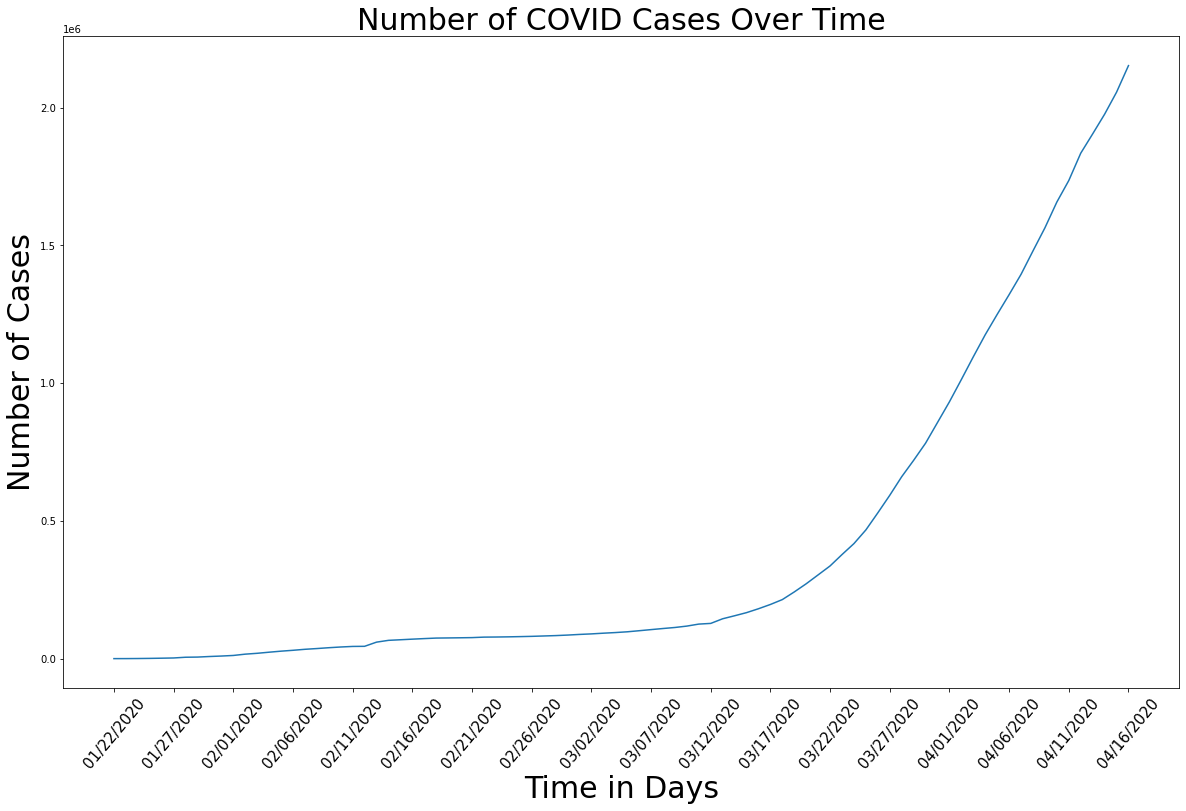

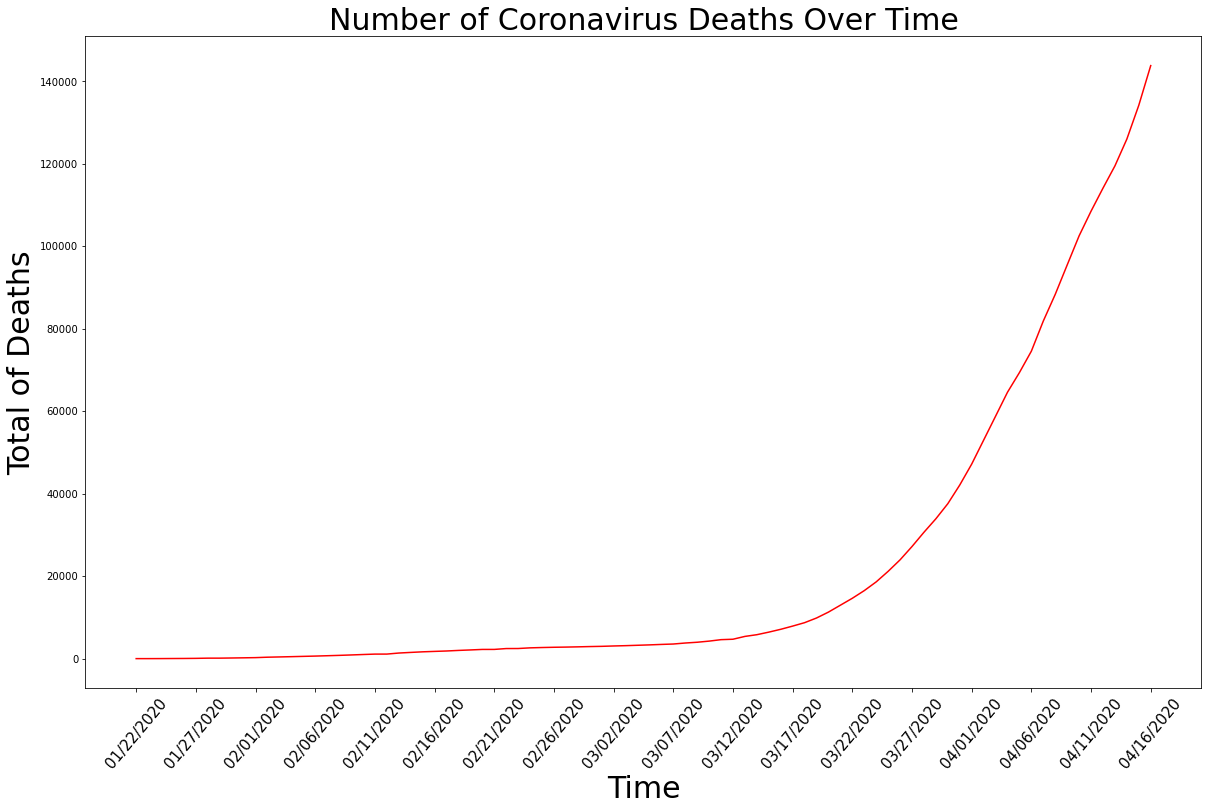

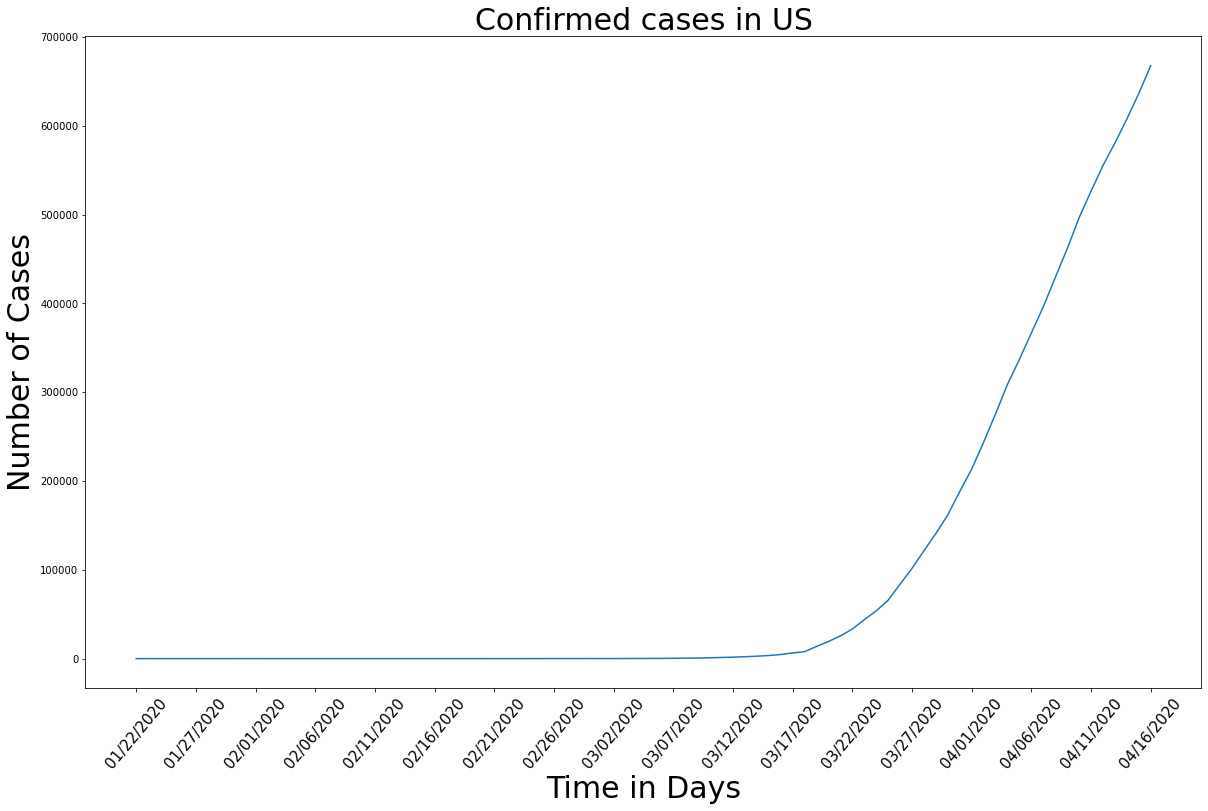

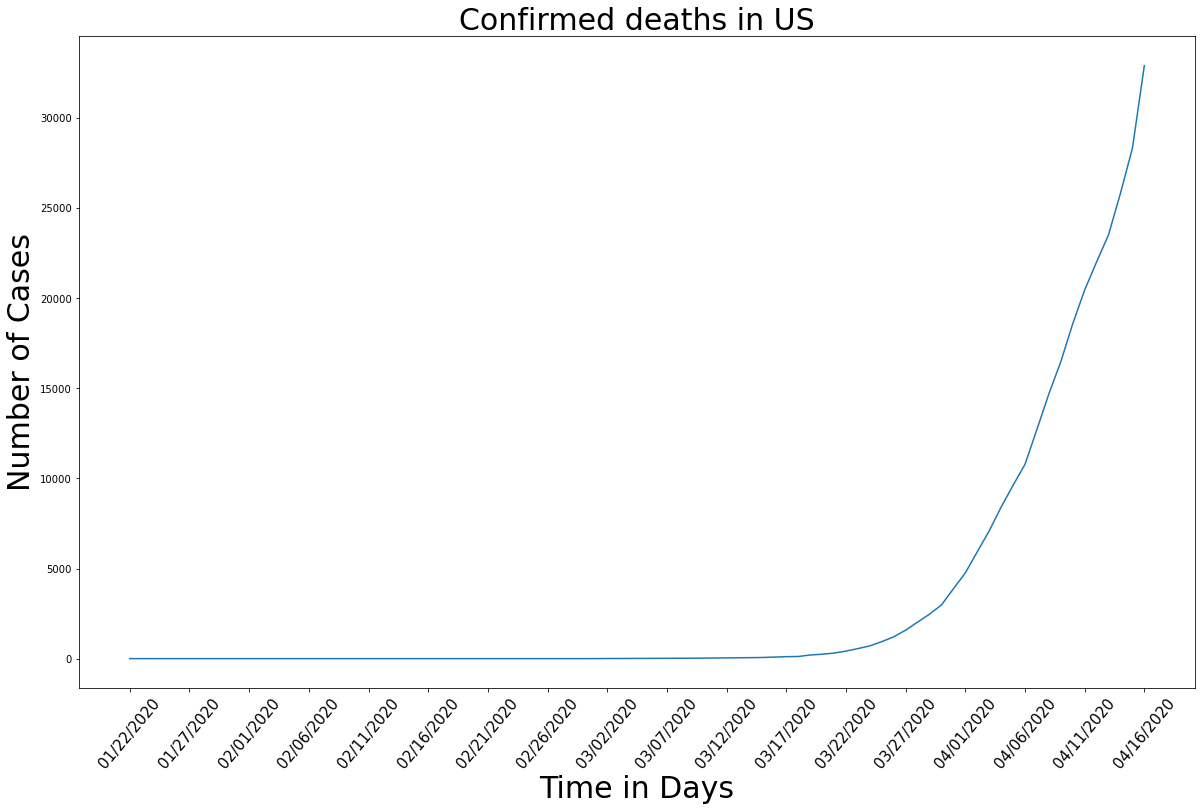

In [11]:
start_date = datetime.strptime(dates[0], '%m/%d/%y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + timedelta(days=i)).strftime('%m/%d/%Y'))
adjusted_dates = future_forcast_dates[:-3]

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of COVID Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.title('Number of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Total of Deaths', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, us_confirmed)
plt.title('Confirmed cases in US', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, us_deaths)
plt.title('Confirmed deaths in US', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

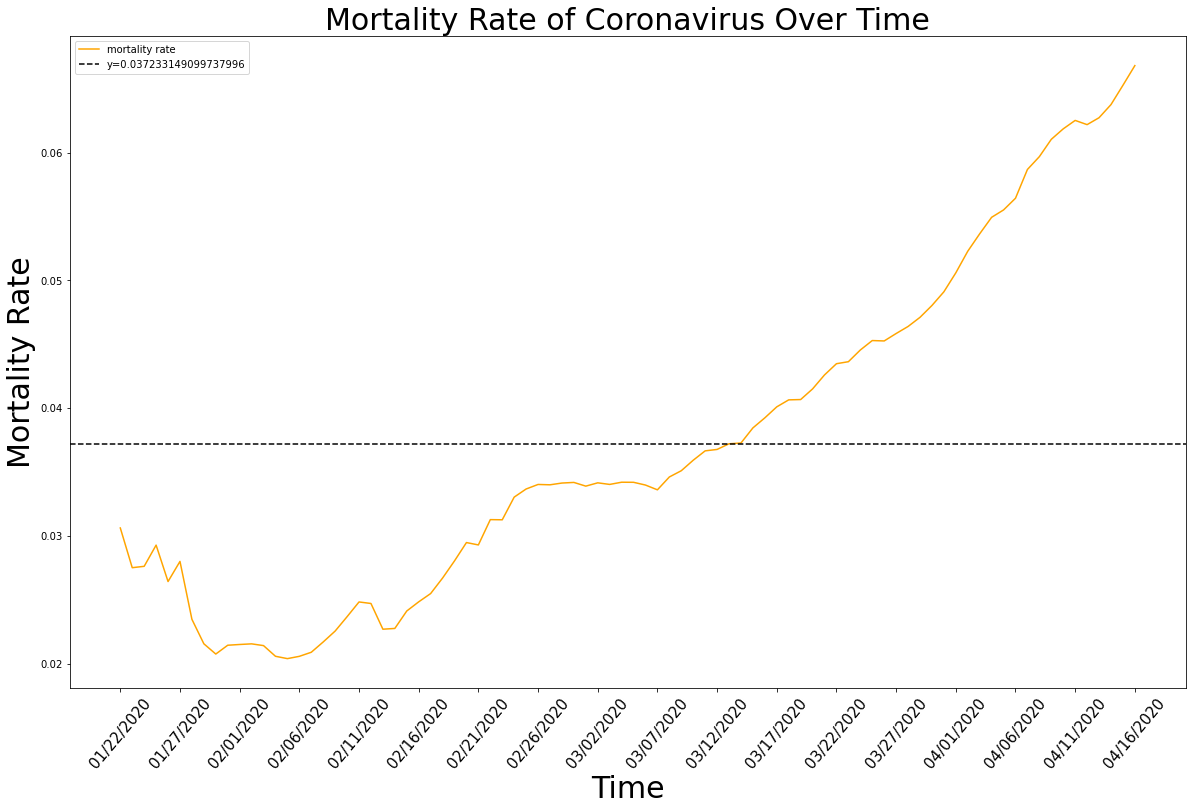

In [12]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y=mean_mortality_rate, linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y=' + str(mean_mortality_rate)])
plt.xlabel('Time', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

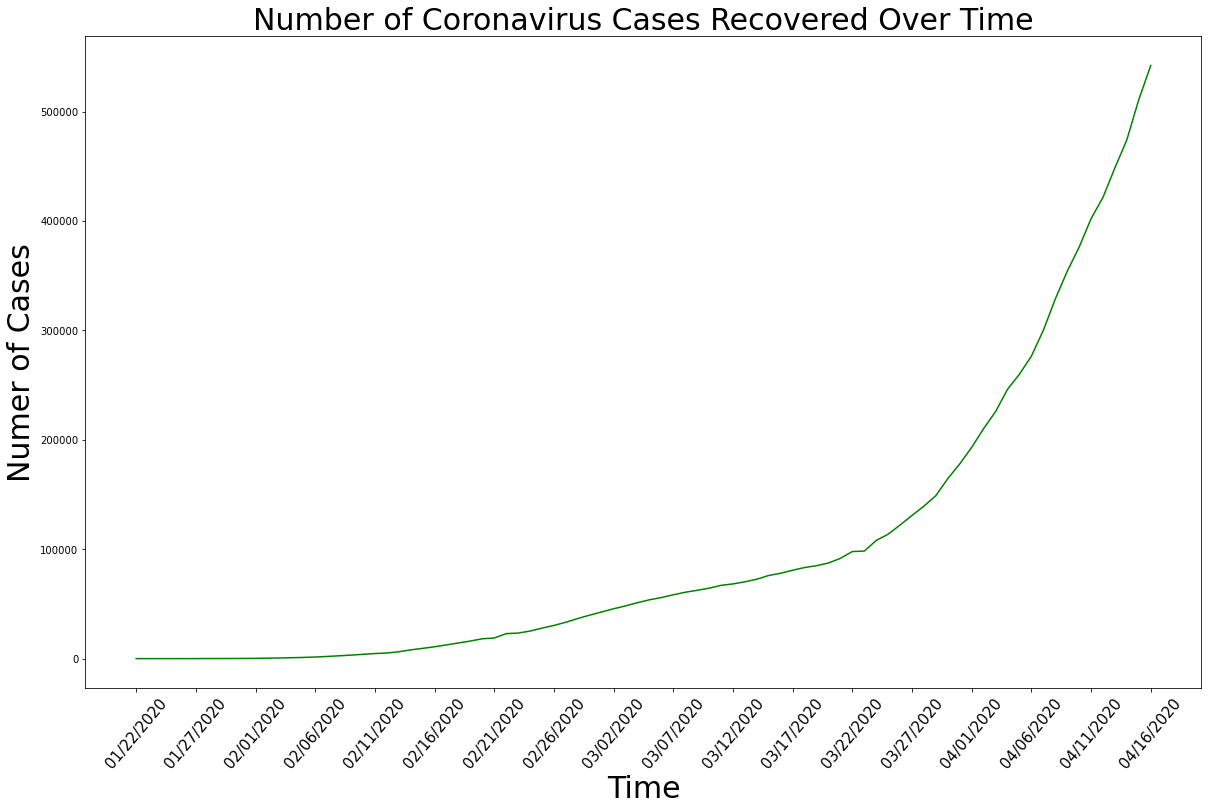

In [13]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_recovered, color='green')
plt.title('Number of Coronavirus Cases Recovered Over Time', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Numer of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

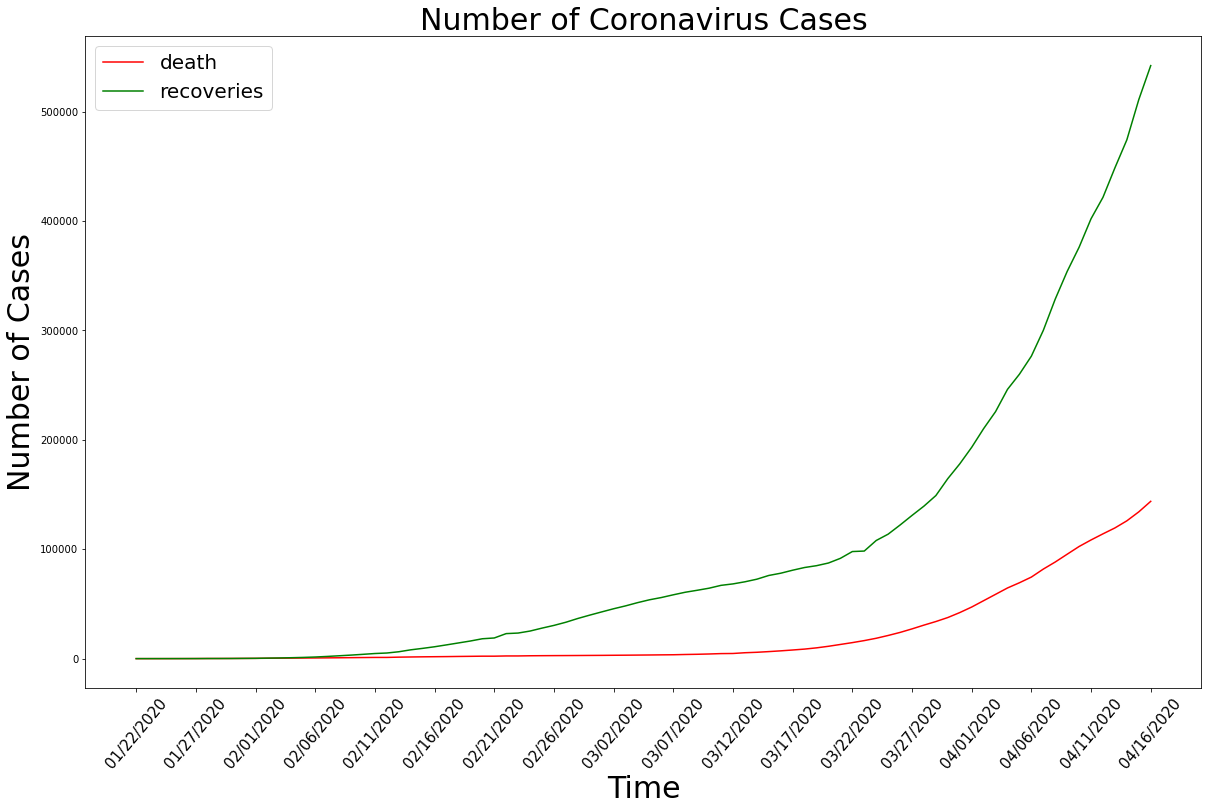

In [14]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='red')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(np.arange(0, len(adjusted_dates), 5), rotation=50, size=15)
plt.show()

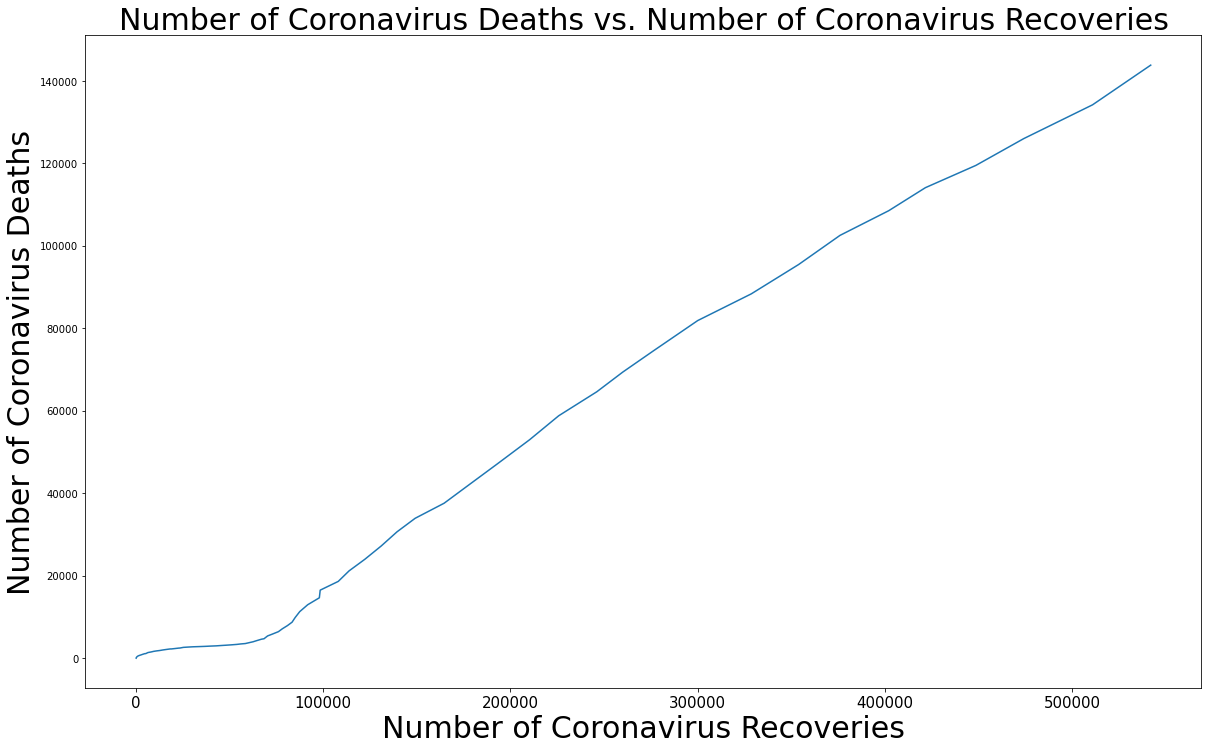

In [15]:
plt.figure(figsize=(20, 12))
plt.plot(total_recovered, total_deaths)
plt.title('Number of Coronavirus Deaths vs. Number of Coronavirus Recoveries', size=30)
plt.xlabel('Number of Coronavirus Recoveries', size=30)
plt.ylabel('Number of Coronavirus Deaths', size=30)
plt.xticks(size=15)
plt.show()

In [16]:
latest_confirmed = confirmed_df[dates[-1]]
latest_deaths = deaths_df[dates[-1]]
latest_recoveries = recovered_df[dates[-1]]

In [17]:
unique_countries = list(confirmed_df['Country/Region'].unique())

In [18]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_df['Country/Region'] == i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_countries.remove(i)

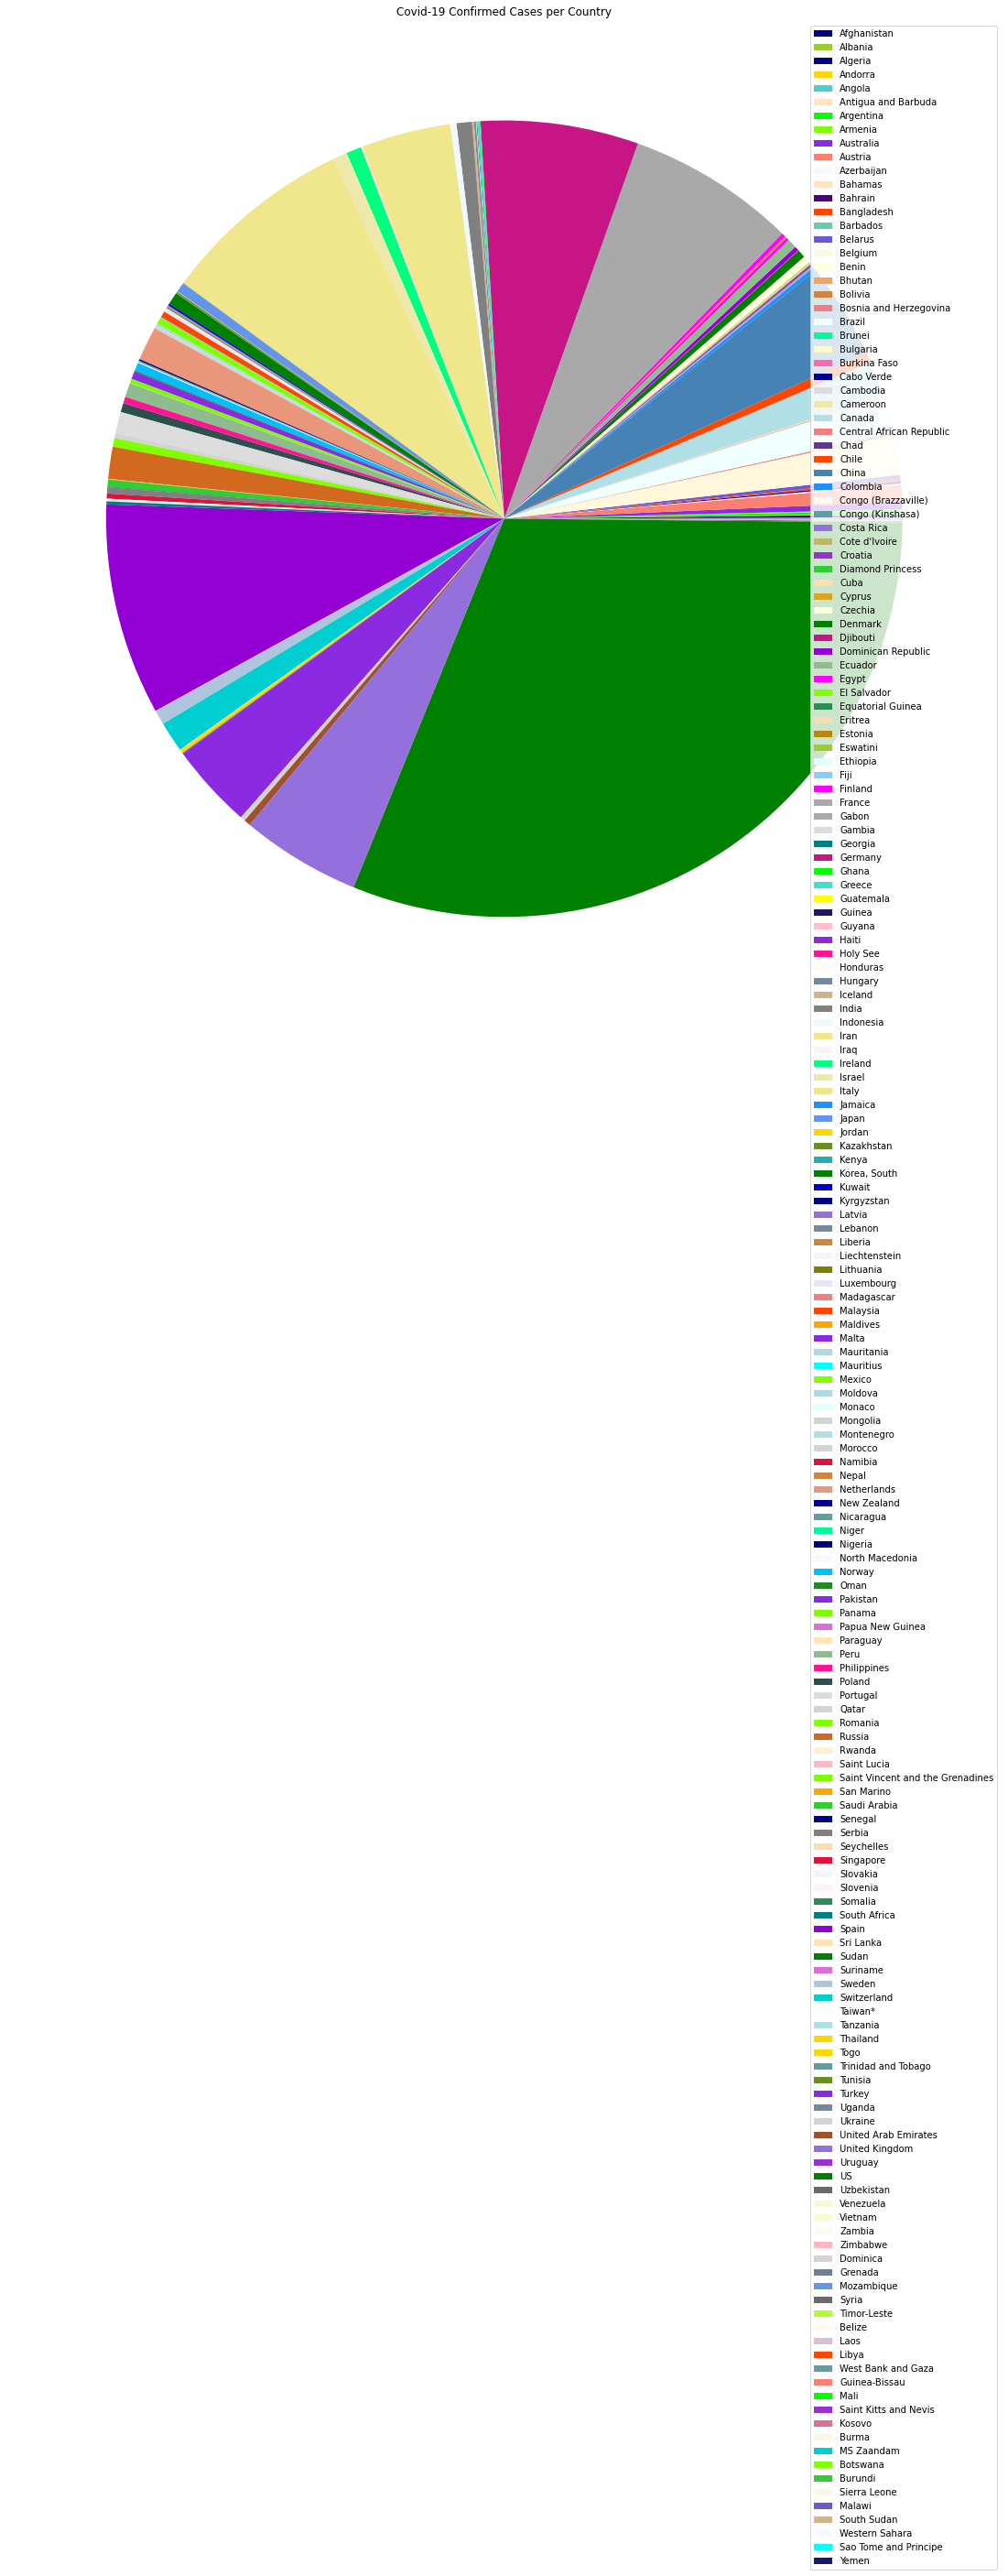

((68, 1), (68, 1), (18, 1), (18, 1))

In [19]:
c = random.choices(list(mcolors.CSS4_COLORS.values()), k=len(unique_countries))
plt.figure(figsize=(20, 20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(country_confirmed_cases, colors=c)
plt.legend(unique_countries, loc='best')
plt.show()

X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,
                                                                                            world_cases, test_size=0.2,
                                                                                            shuffle=False)

X_train_confirmed.shape, y_train_confirmed.shape, X_test_confirmed.shape, y_test_confirmed.shape

# SVM with rbf kernel

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    1.7s finished


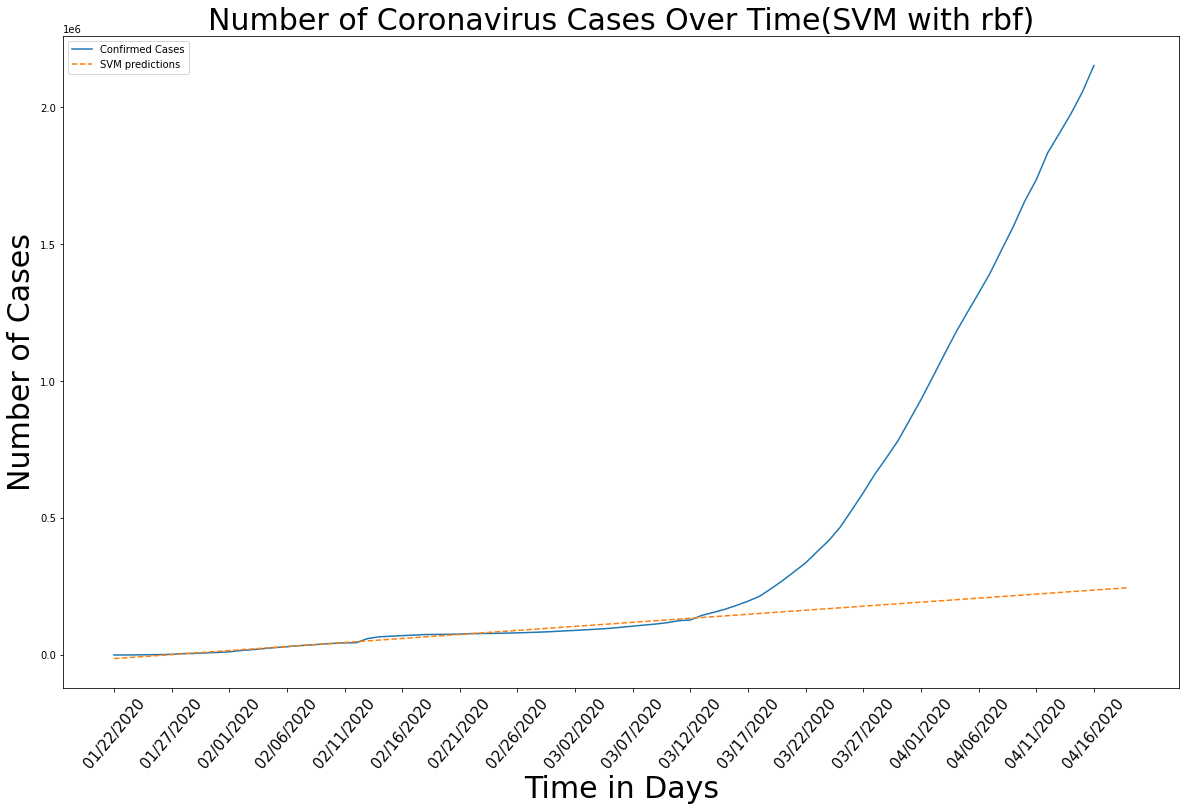

In [20]:
kernel = ['linear', 'rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking = [True, False]
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True,
                                n_jobs=-1, n_iter=30, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)
test_rfr_pred_svm = svm_confirmed.predict(X_test_confirmed)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time(SVM with rbf)', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 5), rotation=50, size=15)
plt.show()

In [21]:
print('MAE SVM(rbf):', mean_absolute_error(test_rfr_pred_svm, y_test_confirmed))
print('MSE SVM(rbf):', mean_squared_error(test_rfr_pred_svm, y_test_confirmed))

MAE SVM(rbf): 1242203.588888889
MSE SVM(rbf): 1705307739445.5872


# SVM with polynomial kernel

Fitting 5 folds for each of 30 candidates, totalling 150 fits
MAE SVM(poly): 799883.6343361635
MSE SVM(poly): 723485998580.39


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 127 out of 150 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    6.3s finished


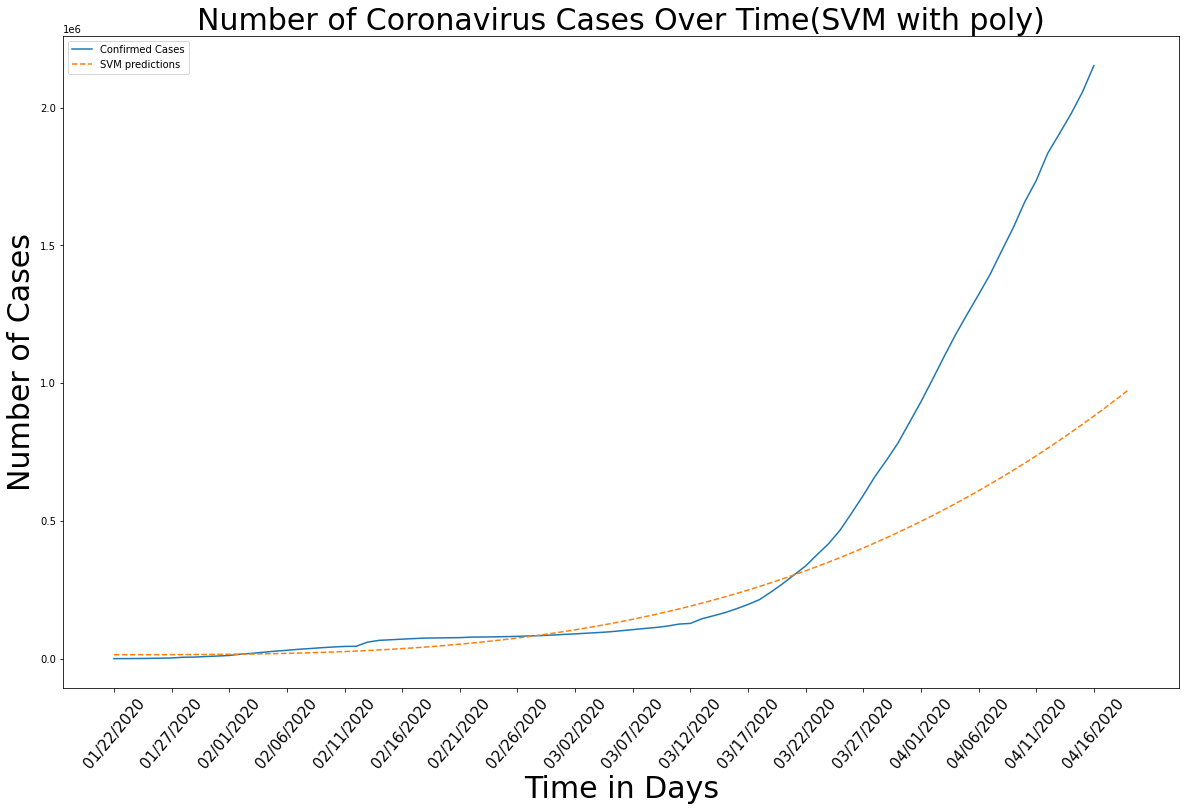

In [22]:
kernel = ['linear', 'poly']
svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=5, return_train_score=True,
                                n_jobs=-1, n_iter=30, verbose=1)

svm_search.fit(X_train_confirmed, y_train_confirmed.ravel())

svm_confirmed = svm_search.best_estimator_
svm_pred = svm_confirmed.predict(future_forcast)
test_rfr_pred_svm = svm_confirmed.predict(X_test_confirmed)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, svm_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time(SVM with poly)', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 5), rotation=50, size=15)
plt.show()

print('MAE SVM(poly):', mean_absolute_error(test_rfr_pred_svm, y_test_confirmed))
print('MSE SVM(poly):', mean_squared_error(test_rfr_pred_svm, y_test_confirmed))

# Instantiate RandomizedSearchCV model

In [23]:
X_train_confirmed_rfr, X_test_confirmed_rfr, y_train_confirmed_rfr, y_test_confirmed_rfr = train_test_split(days_data,
                                                                                                            cases_data,
                                                                                                            test_size=0.1,
                                                                                                            shuffle=False)

X_train_confirmed_rfr.shape, y_train_confirmed_rfr.shape, X_test_confirmed_rfr.shape, y_test_confirmed_rfr.shape

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 7, 10],
           "max_features": [0.5, 1, "sqrt"]}
rfr_model_v2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                        random_state=42),
                                  param_distributions=rf_grid,
                                  n_iter=30,
                                  cv=5,
                                  verbose=True)

rfr_model_v2.fit(X_train_confirmed_rfr, y_train_confirmed_rfr.ravel())

test_rfr_pred = rfr_model_v2.predict(X_test_confirmed_rfr)
rfr_pred = rfr_model_v2.predict(future_forcast)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


In [24]:
print('MAE RFR:1', mean_absolute_error(test_rfr_pred, y_test_confirmed_rfr))
print('MSE RFR 1:', mean_squared_error(test_rfr_pred, y_test_confirmed_rfr))

MAE RFR:1 2668.78824640346
MSE RFR 1: 9383436.13439258


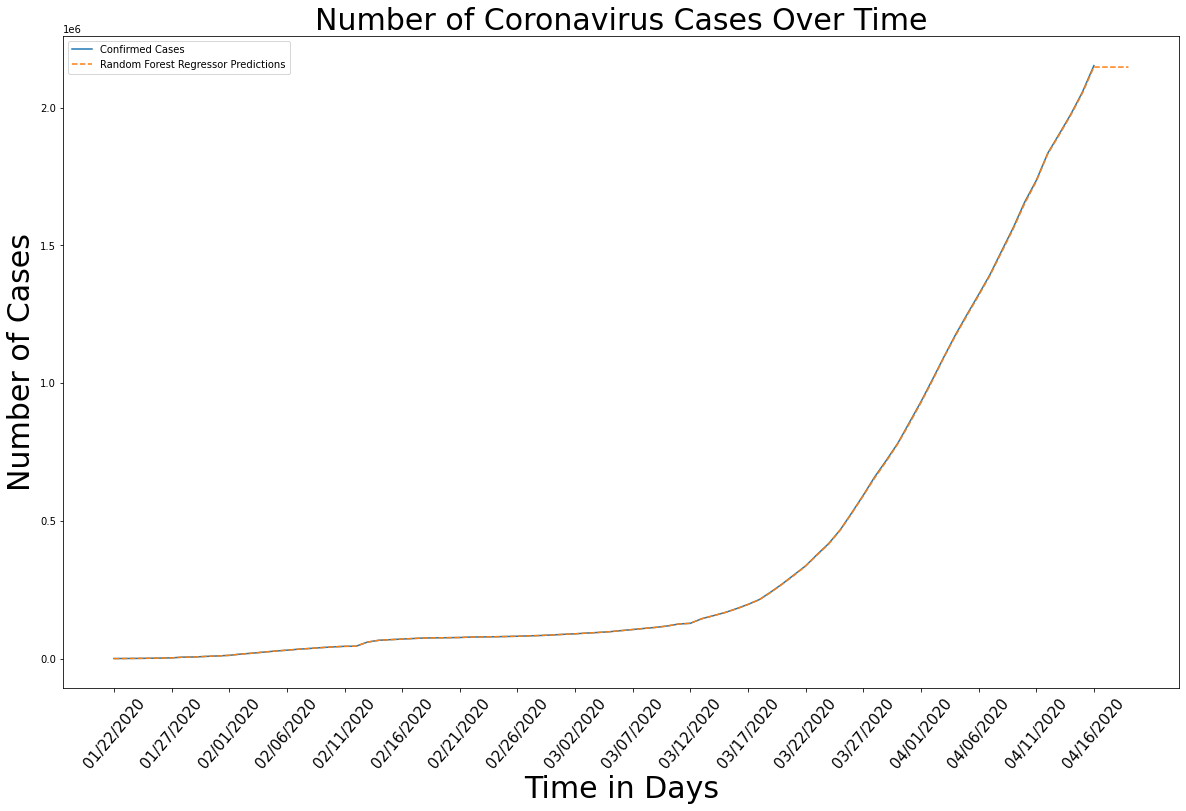

In [25]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions'])
plt.xticks(np.arange(0, len(future_forcast_dates), 5), rotation=50, size=15)
plt.show()

In [26]:
print('Random Forest Regessor prediction: ', set(zip(future_forcast_dates[-20:], rfr_pred[-20:])))

Random Forest Regessor prediction:  {('04/04/2020', 1172131.4215686275), ('04/18/2020', 2147375.711764706), ('04/03/2020', 1093649.1137254902), ('04/13/2020', 1901678.2843137255), ('03/31/2020', 853216.7607843138), ('04/01/2020', 928934.0058823529), ('04/09/2020', 1559209.8705882353), ('04/10/2020', 1652113.1764705882), ('04/16/2020', 2147375.711764706), ('04/11/2020', 1731820.3921568627), ('04/15/2020', 2052048.156862745), ('04/14/2020', 1973252.9352941175), ('04/07/2020', 1391869.688235294), ('04/05/2020', 1245993.1941176471), ('04/19/2020', 2147375.711764706), ('04/02/2020', 1009502.225490196), ('04/12/2020', 1831807.1470588236), ('04/06/2020', 1317836.0117647059), ('04/17/2020', 2147375.711764706), ('04/08/2020', 1475721.2235294117)}


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   58.9s finished


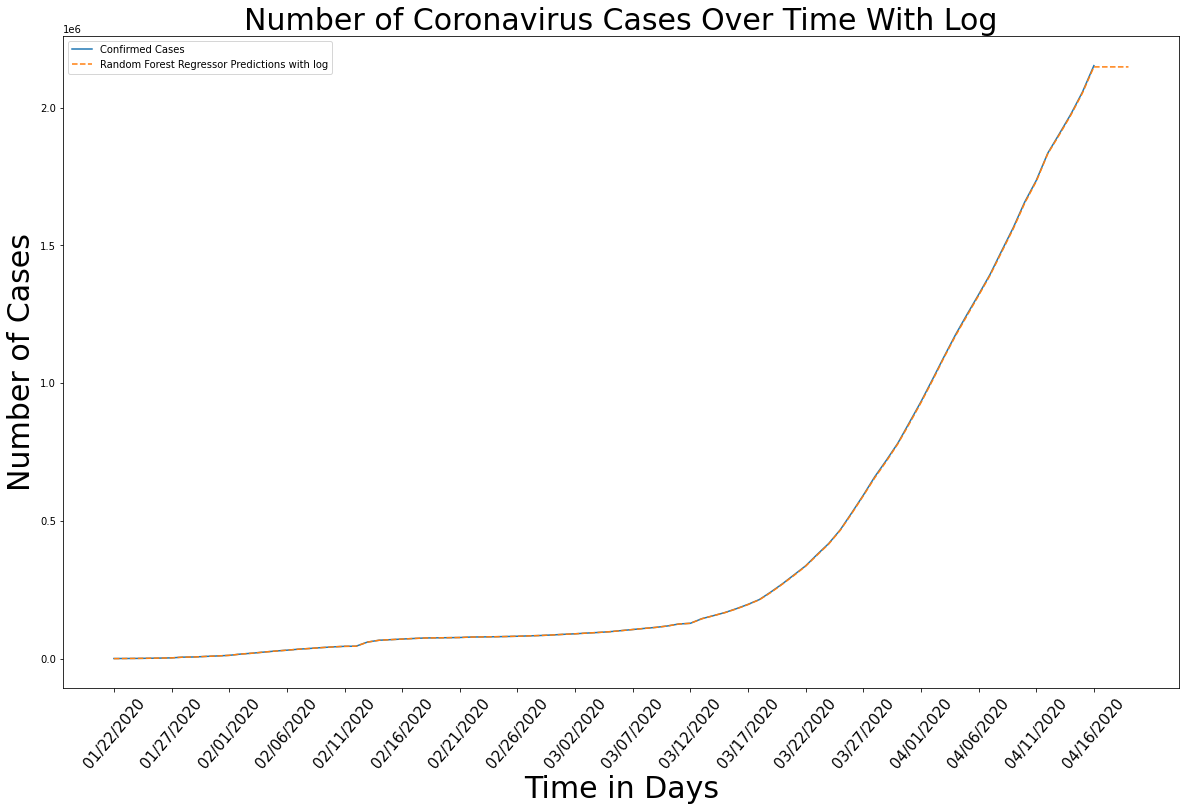

In [27]:
rf_grid2 = {"n_estimators": np.arange(10, 1000, 50),
            "max_depth": [None, 3, 7, 10],
            "max_features": [0.5, 1, "log2"]}

rfr_model2_v2 = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                         random_state=42),
                                   param_distributions=rf_grid,
                                   n_iter=30,
                                   cv=5,
                                   verbose=True)

rfr_model2_v2.fit(X_train_confirmed_rfr, y_train_confirmed_rfr.ravel())

test_rfr_pred2 = rfr_model2_v2.predict(X_test_confirmed_rfr)
rfr_pred2 = rfr_model2_v2.predict(future_forcast)

plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast_dates, rfr_pred2, linestyle='dashed')
plt.title('Number of Coronavirus Cases Over Time With Log', size=30)
plt.xlabel('Time in Days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Random Forest Regressor Predictions with log'])
plt.xticks(np.arange(0, len(future_forcast_dates), 5), rotation=50, size=15)
plt.show()

In [28]:
print('MAE RFR 2:', mean_absolute_error(test_rfr_pred2, y_test_confirmed_rfr))
print('MSE RFR 2:', mean_squared_error(test_rfr_pred2, y_test_confirmed_rfr))

MAE RFR 2: 2601.470014168151
MSE RFR 2: 8653885.303762078
